In [76]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt


In [4]:
basename = "../outputs/system_migovec"


In [139]:

def from_therion_sql(basename, year1, year2, survey = "system_migovec"):
    sql_name = basename + '.sql'

    # Read data files if exist - otherwise return empty graph
    try:
        conn = sqlite3.connect(':memory:')
        conn.executescript(open(sql_name).read())
    #    	conn.executescript(open('../data/g_huttes.sql').read())
    except OSError:
        print("IMPORT ERROR: Could not import {}".format(sql_name))

    # Read the SQL file and extract nodes and links data for a given year
    c = conn.cursor()
    c.execute(f"select st1.ID, st1.NAME, st2.ID, st2.NAME,  st1.X, st1.Y, st1.Z, st2.X, st2.Y, st2.Z, ct.EXPLO_DATE\
            from STATION st1, STATION st2, SHOT sh, CENTRELINE ct, SURVEY su\
            WHERE st1.SURVEY_ID = su.ID and st2.SURVEY_ID = su.ID and su.ID = ct.SURVEY_ID and\
            sh.FROM_ID = st1.ID and sh.TO_ID = st2.ID and sh.CENTRELINE_ID = ct.ID and\
            st2.NAME != '.' and st2.NAME !='-' and ct.TOPO_DATE >= '{year1}-01-01' and ct.TOPO_DATE < '{year2}-01-01'\
            and su.FULL_NAME like '%{survey}%';")

    shots = []
    for s in c.fetchall():
        shot = np.vstack((s[4:7], s[7:10])).T
        shots.append(shot)
    return shots

In [140]:
def plot_between(ax, cave, dates, proj = "N", color= "k", label = False):
    if proj == "N":
        idx = 0
    elif proj == "E":
        idx = 1
    else:
        print("invalid projection chosen, must be N or E")
    shots = from_therion_sql(basename, dates[0], dates[1], survey=cave)

    for c, shot in enumerate(shots):
        if np.sqrt(np.sum(np.diff(shot, axis = 1)**2)) > 100:
            print("too long shot")
        else:
            if c != 0 or label == False:
                ax.plot(shot[idx], shot[2],color = color, lw = 0.5)
            else:
                ax.plot(shot[idx], shot[2],color = color, lw = 0.5, label = f"{dates[0]} - {dates[1]}")

    return ax

too long shot


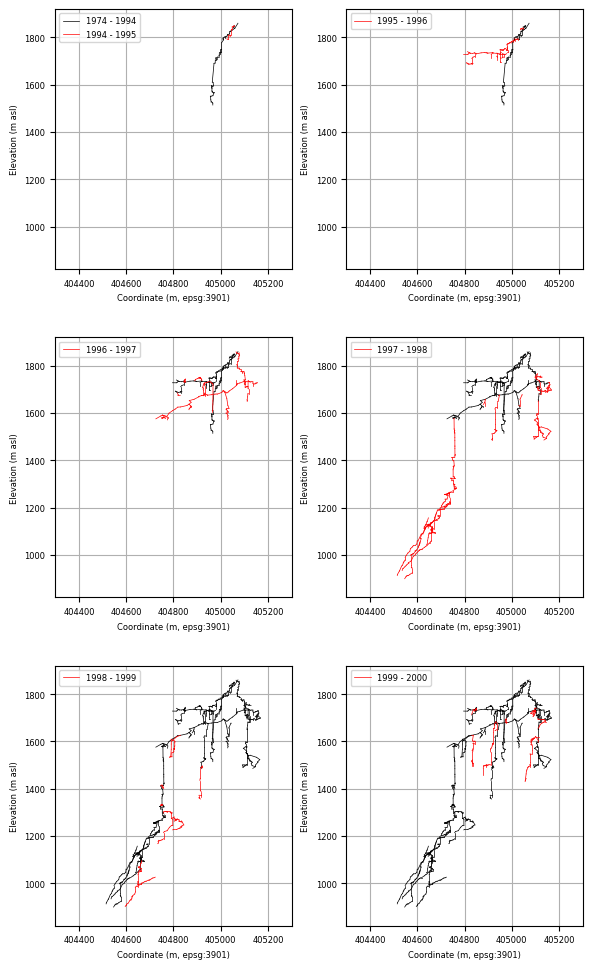

In [149]:
cave = "m2m16m18"
years = (1974, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001)
fig, axes = plt.subplots(3, 2, figsize = (6, 10))

for c, (year, ax) in enumerate(zip(years[2:], axes.flatten())):
    if c == 0:
        plot_between(ax, cave, (years[0], years[c+1]), label = True)
    else: 
        plot_between(ax, cave, (years[0], years[c+1]))

    plot_between(ax, cave, (years[c+1],years[c+2]), color = "red", label=True)

    ax.set_aspect(aspect="equal")
    ax.set_xlim(404300, 405300)
    ax.set_ylim(820, 1920)
    ax.grid("x")
    ax.legend(prop = {'size' : 6})
    ax.set_xlabel("Coordinate (m, epsg:3901)", fontsize=6)
    ax.set_ylabel("Elevation (m asl)", fontsize = 6)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.savefig(f"Exploration_{cave}.png", dpi=300)
plt.show()

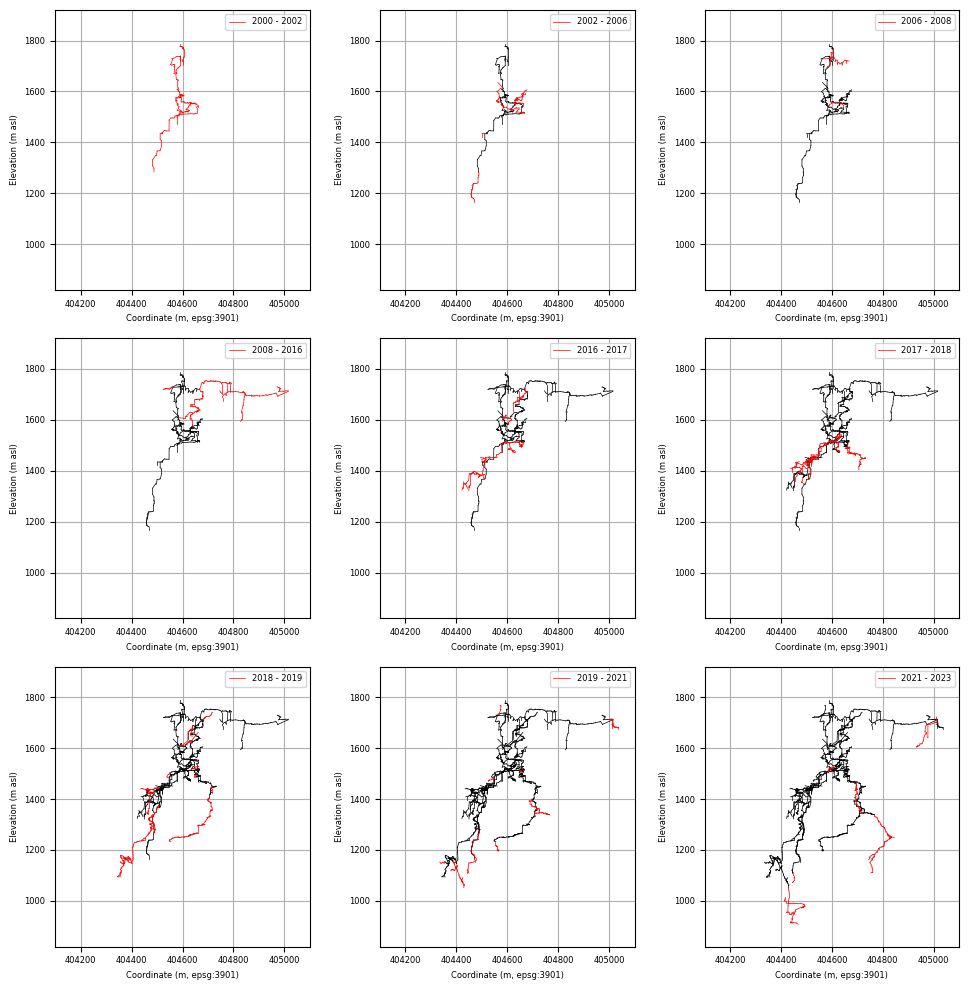

In [150]:
cave = "primadona_ubend_mona_tip"
years = (1999,2000, 2002, 2006, 2008, 2016, 2017, 2018, 2019, 2021, 2023)
fig, axes = plt.subplots(3, 3, figsize = (10, 10))

for c, (year, ax) in enumerate(zip(years[2:], axes.flatten())):
    plot_between(ax, cave, (years[0], years[c+1]))
    plot_between(ax, cave, (years[c+1],years[c+2]), color = "red", label=True)

    ax.set_aspect(aspect="equal")
    ax.set_xlim(404100, 405100)
    ax.set_ylim(820, 1920)
    ax.grid("x")
    ax.legend(prop = {'size' : 6})
    ax.set_xlabel("Coordinate (m, epsg:3901)", fontsize=6)
    ax.set_ylabel("Elevation (m asl)", fontsize = 6)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.savefig(f"Exploration_{cave}.png", dpi = 300)
plt.show()

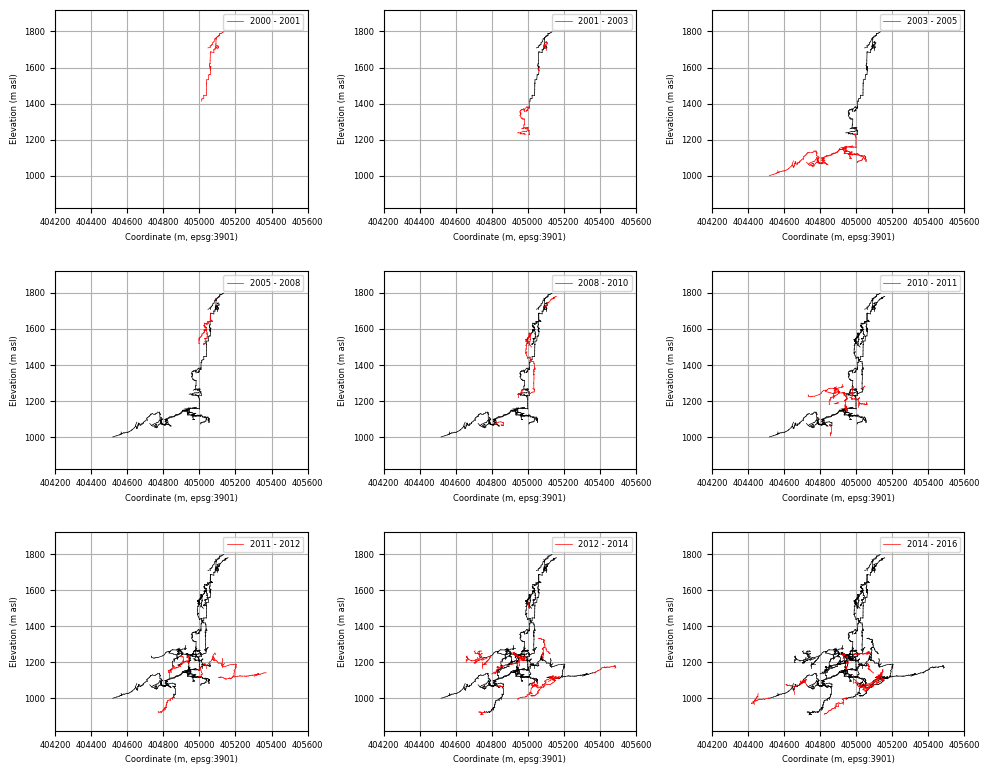

In [151]:
cave = "vrtnarija_vilinska"
years = (1999, 2000,2001, 2003, 2005, 2008, 2010, 2011, 2012, 2014, 2016)
fig, axes = plt.subplots(3, 3, figsize = (10, 8))

for c, (year, ax) in enumerate(zip(years[2:], axes.flatten())):
    plot_between(ax, cave, (years[0], years[c+1]))
    plot_between(ax, cave, (years[c+1],years[c+2]), color = "red", label=True)

    ax.set_aspect(aspect="equal")
    ax.set_xlim(404200, 405600)
    ax.set_ylim(820, 1920)
    ax.grid("x")
    ax.legend(prop = {'size' : 6})
    ax.set_xlabel("Coordinate (m, epsg:3901)", fontsize=6)
    ax.set_ylabel("Elevation (m asl)", fontsize = 6)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.savefig(f"Exploration_{cave}.png", dpi = 300)
plt.show()

too long shot
too long shot
too long shot
too long shot
too long shot
too long shot
too long shot


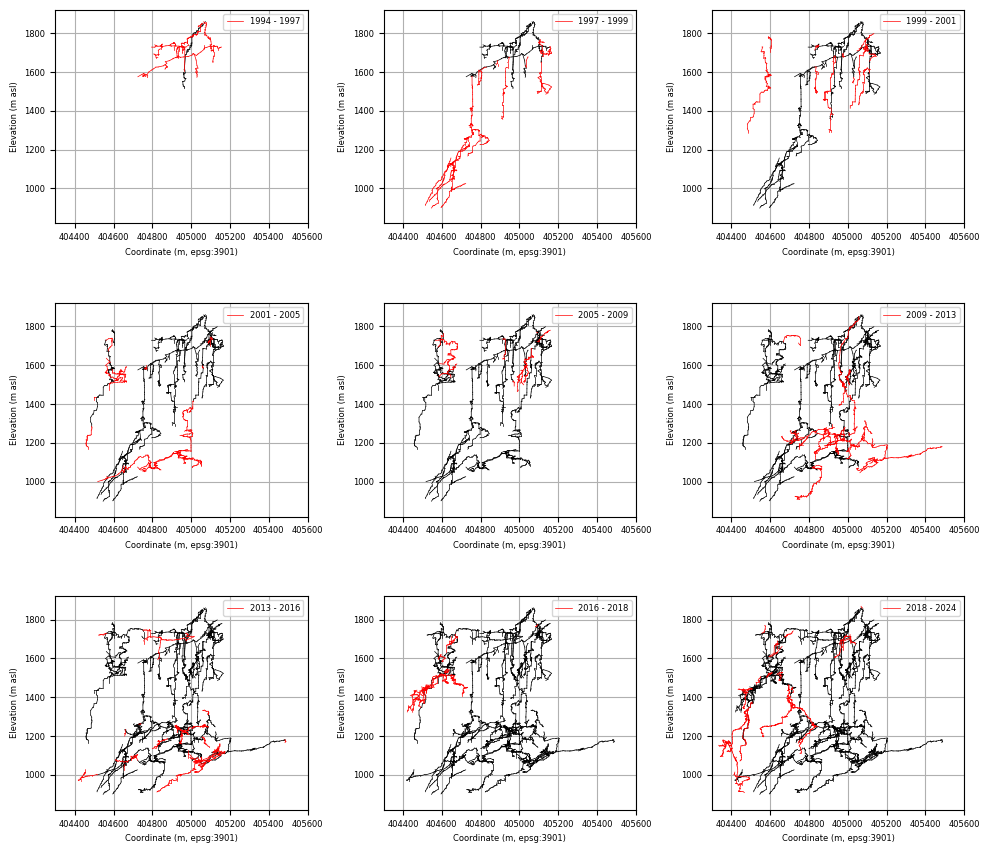

In [152]:
cave = "system_migovec"
years = (1973, 1994, 1997,1999, 2001, 2005, 2009, 2013, 2016, 2018, 2024)
fig, axes = plt.subplots(3, 3, figsize = (10, 9))

for c, (year, ax) in enumerate(zip(years[2:], axes.flatten())):
    plot_between(ax, cave, (years[0], years[c+1]))
    plot_between(ax, cave, (years[c+1],years[c+2]), color = "red", label=True)

    ax.set_aspect(aspect="equal")
    ax.set_xlim(404300, 405600)
    ax.set_ylim(820, 1920)
    ax.grid("x")
    ax.legend(prop = {'size' : 6})
    ax.set_xlabel("Coordinate (m, epsg:3901)", fontsize=6)
    ax.set_ylabel("Elevation (m asl)", fontsize = 6)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.savefig(f"Exploration_{cave}.png", dpi =300)
plt.show()